In [5]:
import os
import pandas as pd
import pickle
import numpy as np

In [6]:
a = 3

In [7]:
def merge_pickled_dictionaries(main_folder_path, protein):
    i = 0
    merged_dict = {}
    for root, dirs, files in os.walk(main_folder_path):
        # Check if the current directory has a subdirectory with the protein name
        if protein in dirs:
            # Construct the path to the protein-specific subsubfolder
            protein_folder_path = os.path.join(root, protein)
            # Look for the 'scores_dict.pkl' file specifically in the protein folder
            for root_protein, dirs_protein, files_protein in os.walk(protein_folder_path):
                if 'scores_dict.pkl' in files_protein:
                    try:
                        file_path = os.path.join(root_protein, 'scores_dict.pkl')
                        with open(file_path, 'rb') as f:
                            data = pickle.load(f)
                        if isinstance(data, dict):
                            merged_dict.update(data)
                        else:
                            pass
                    except Exception as e:
                        print(f"Error: {e}")
                        i += 1
                        
    print(f"Number of errors: {i}")
    print()
    return merged_dict

In [8]:
proteins = os.listdir('proteins/')
proteins = [p[:-4] for p in proteins if p.endswith('.pdb')]
proteins

['dnmt3a',
 'tbc1d1',
 'ankh',
 'scn10a',
 'gpr75',
 'gipr',
 'umod',
 'cfhr5',
 'pcsk9',
 'rnf186',
 'tyk2',
 'nlrp3',
 'il4r',
 'dpp9',
 'apol1',
 'scn9a',
 'f10a',
 'slc6a19',
 'card6',
 'tnfsf15',
 'gys1',
 'dpp4',
 'adcy5',
 'inhbe',
 'map3k15',
 'ifih1',
 'slc30a8',
 'ubash3a',
 'lrp2']

In [9]:
j = 0

for i in proteins:
    j+=1

j

29

In [10]:
%%time

dicts = []
main_folder_path = './input'

for protein in proteins:

    merged_dict = merge_pickled_dictionaries(main_folder_path, protein)
    dicts.append(merged_dict)
    print('Read protein: ' + protein)

Number of errors: 0

Read protein: dnmt3a
Number of errors: 0

Read protein: tbc1d1
Number of errors: 0

Read protein: ankh
Number of errors: 0

Read protein: scn10a
Number of errors: 0

Read protein: gpr75
Number of errors: 0

Read protein: gipr
Number of errors: 0

Read protein: umod
Number of errors: 0

Read protein: cfhr5
Number of errors: 0

Read protein: pcsk9
Number of errors: 0

Read protein: rnf186
Number of errors: 0

Read protein: tyk2
Number of errors: 0

Read protein: nlrp3
Number of errors: 0

Read protein: il4r
Number of errors: 0

Read protein: dpp9
Number of errors: 0

Read protein: apol1
Number of errors: 0

Read protein: scn9a
Number of errors: 0

Read protein: f10a
Number of errors: 0

Read protein: slc6a19
Error: Ran out of input
Error: Ran out of input
Error: Ran out of input
Error: Ran out of input
Error: Ran out of input
Error: Ran out of input
Error: Ran out of input
Error: Ran out of input
Error: Ran out of input
Error: Ran out of input
Error: Ran out of input

In [12]:
%%time

dfs = []

for dict in dicts:

    if len(dict) == 0:
        print('Empty')
        dfs.append(pd.DataFrame())
    else:
        df = pd.DataFrame.from_dict(dict)
        df = df.T
        df.columns = ['score1']
        df = df[df.score1.apply(lambda x: isinstance(x, float))]
        df.score1 = pd.to_numeric(df.score1)
        dfs.append(df)
        print('Done converting to df')

Empty
Empty
Done converting to df
Done converting to df
Done converting to df
Empty
Empty
Done converting to df
Empty
Empty
Done converting to df
Done converting to df
Empty
Done converting to df
Done converting to df
Done converting to df
Empty
Done converting to df
Done converting to df
Empty
Empty
Done converting to df
Done converting to df
Empty
Done converting to df
Done converting to df
Done converting to df
Empty
Empty


In [ ]:
dfs[1]

In [13]:
for i in range(len(proteins)):
    
    dfs[i]['protein'] = proteins[i]
    print('Done')

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [ ]:
dfs[3]

In [14]:
df = pd.concat(dfs)

In [16]:
len(df)

26196574

In [15]:
df.protein.value_counts()

protein
apol1      1778268
nlrp3      1766922
adcy5      1759689
map3k15    1732010
scn9a      1717097
card6      1711688
tyk2       1698552
dpp9       1609893
dpp4       1608898
ifih1      1596191
gpr75      1593083
ankh       1570029
slc30a8    1555209
slc6a19    1533231
cfhr5      1484393
scn10a     1481421
Name: count, dtype: int64

In [17]:
df = df.reset_index()


In [18]:
df = df.sample(frac = 1)

In [19]:
df = df.rename(columns={'index':'ligand'})

In [20]:
df = df.rename(columns={'score1':'score'})

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
validate_df, test_df = train_test_split(temp_df, test_size=1/3, random_state=42)  # 1/3 of 30% is 10%

In [23]:
train_df.to_csv('datasets/smiles2dock_train.csv', index=False)

In [24]:
test_df.to_csv('datasets/smiles2dock_val.csv', index=False)

In [25]:
validate_df.to_csv('datasets/smiles2dock_test.csv', index=False)

In [2]:
train_set = pd.read_csv('datasets/smiles2dock_train.csv')

In [2]:
val_set = pd.read_csv('datasets/smiles2dock_test.csv')

In [14]:
import pandas as pd

val_set

,ligand,protein,score
0,CHEMBL4524901,scn9a,-9.664
1,CHEMBL1889909,ankh,-2.379
2,CHEMBL5019723,gpr75,-7.135
3,CHEMBL3478566,adcy5,-6.938
4,CHEMBL3682063,scn10a,-6.568
...,...,...,...
5239310,CHEMBL4520280,dpp9,-8.223
5239311,CHEMBL4527742,ifih1,-8.086
5239312,CHEMBL523331,map3k15,-8.648
5239313,CHEMBL3502702,scn9a,-11.773


In [15]:
proteins = val_set.protein.unique()
print(proteins)

['scn9a' 'ankh' 'gpr75' 'adcy5' 'scn10a' 'map3k15' 'card6' 'cfhr5' 'tyk2'
 'dpp9' 'slc6a19' 'apol1' 'nlrp3' 'ifih1' 'dpp4' 'slc30a8']


In [27]:
from scipy import stats

ImportError: cannot import name 'probplot' from 'scipy' (/oak/stanford/groups/mrivas/projects/multiomics/tlmenest/conda/envs/docking/lib/python3.10/site-packages/scipy/__init__.py)

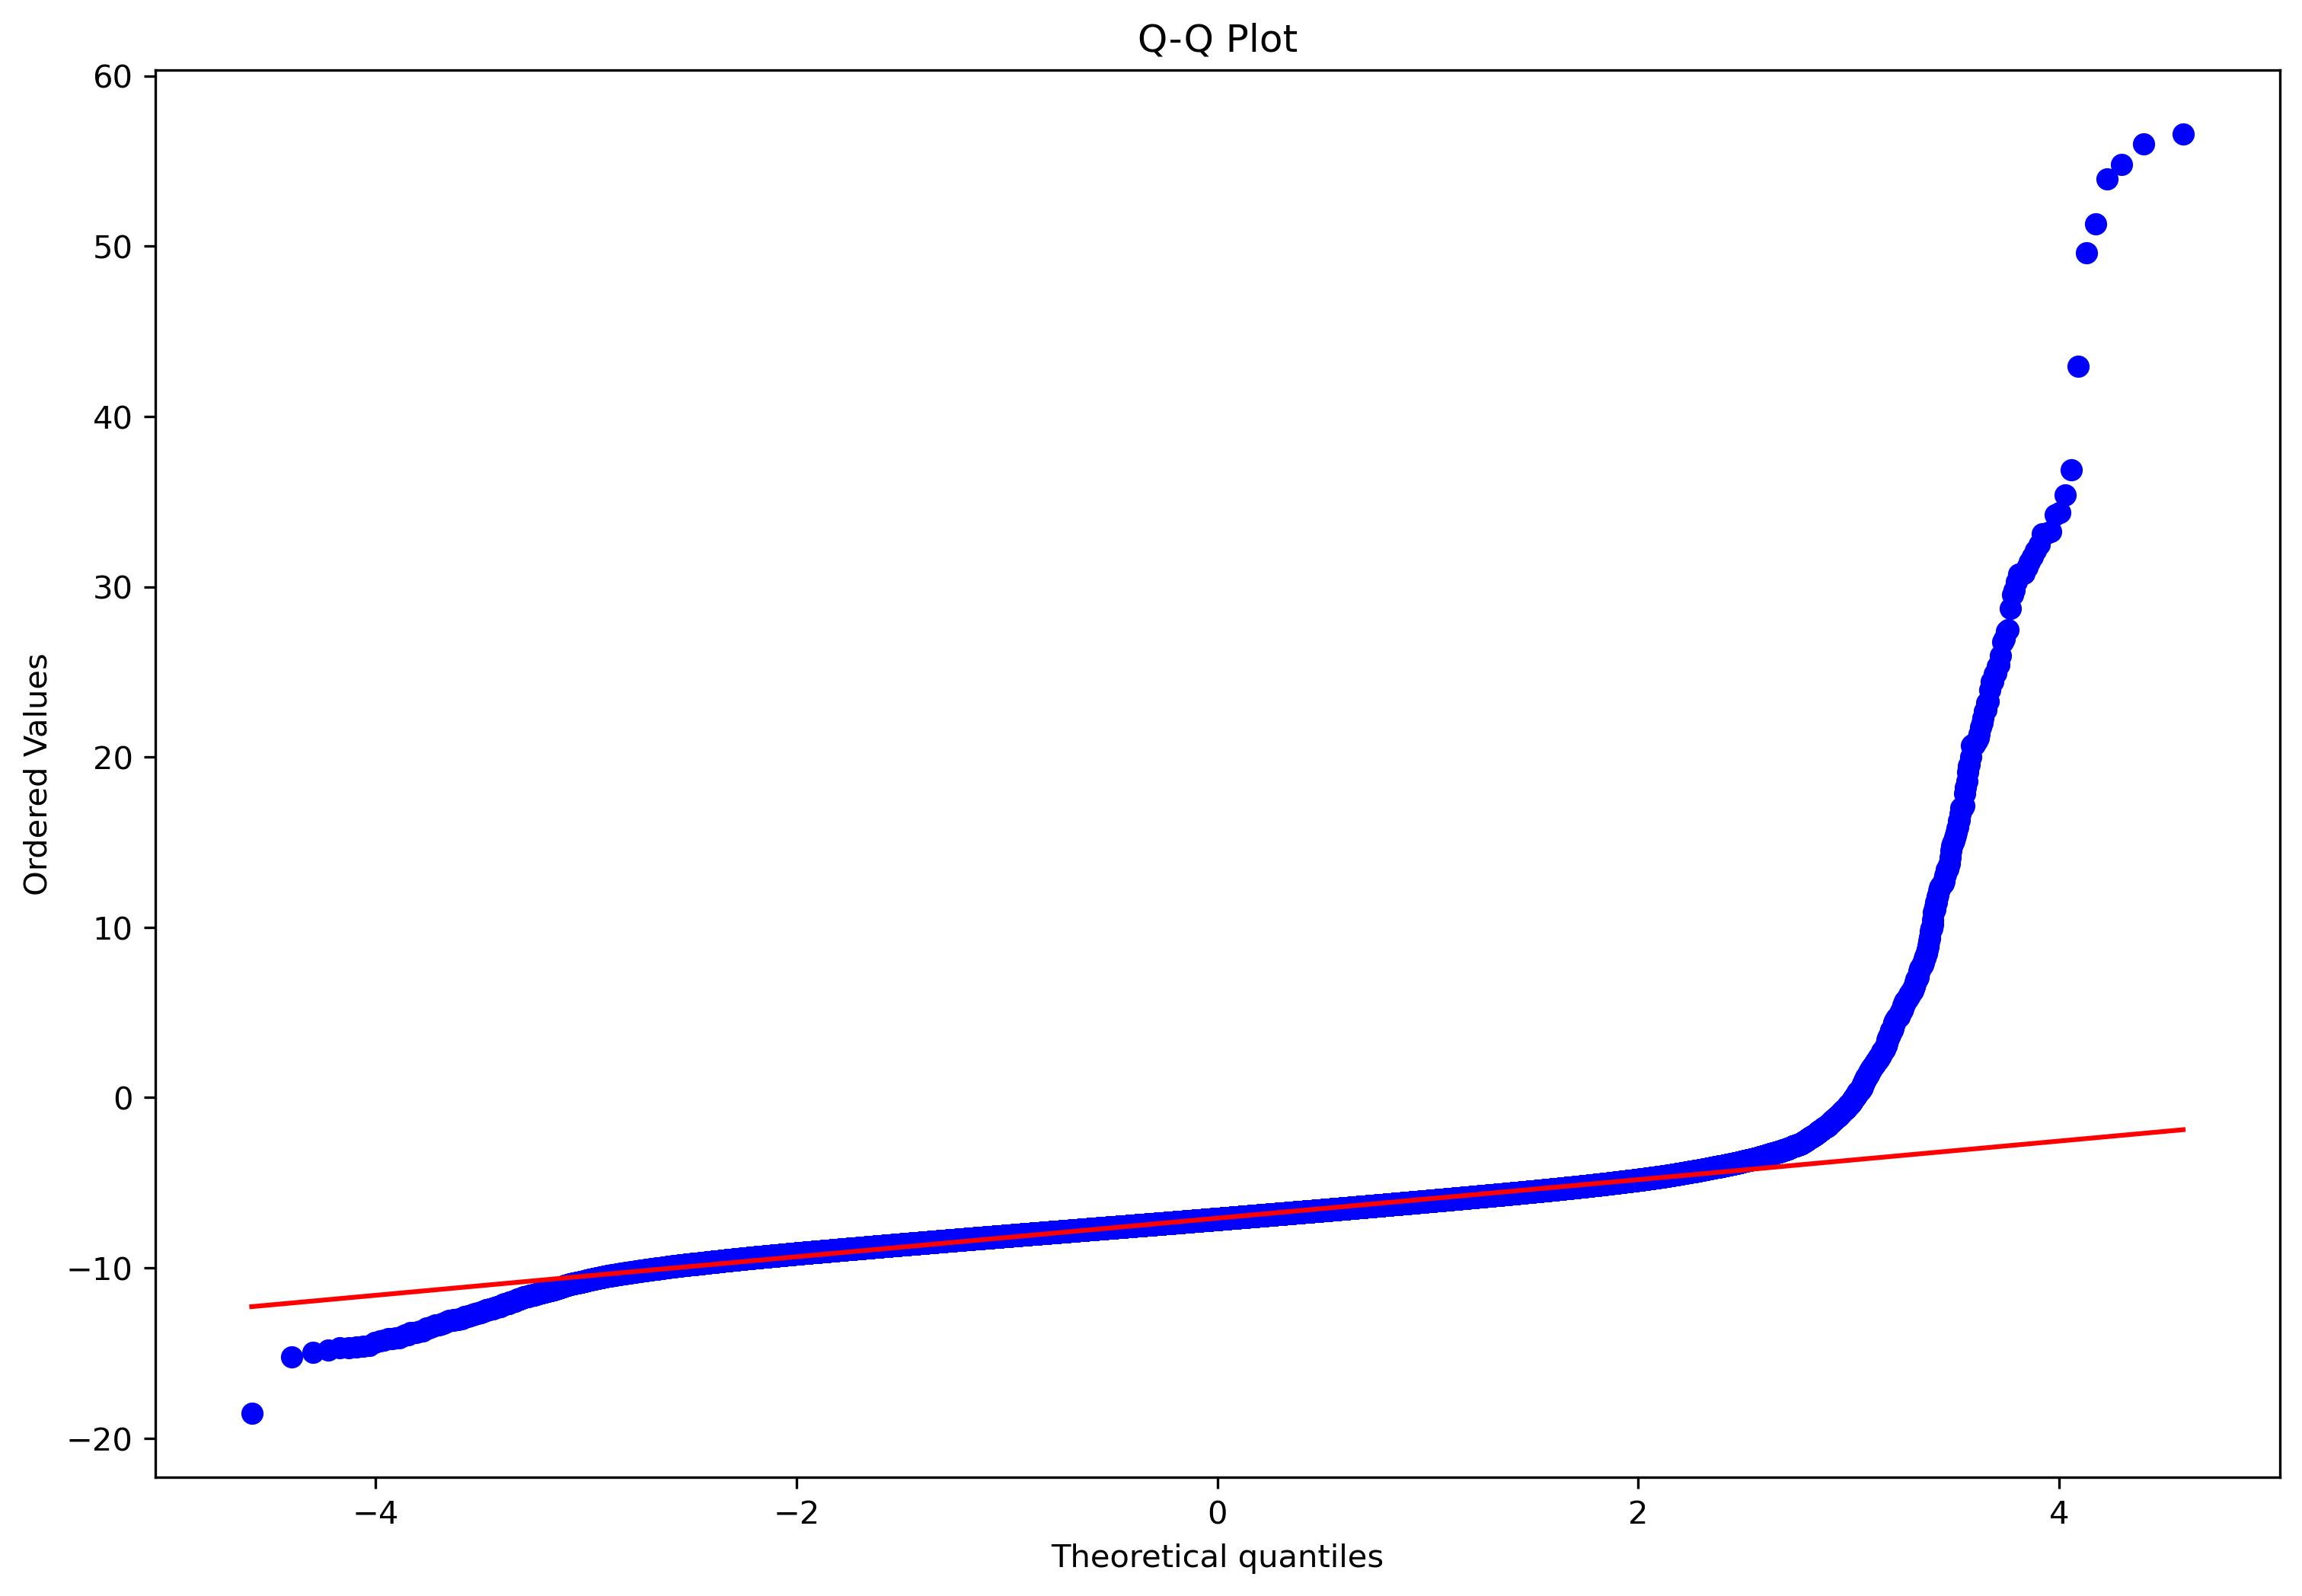

In [38]:
plt.figure(figsize=(12, 8), dpi=300)
stats.probplot(df.score, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [35]:
val_set[val_set.score > 100]

,ligand,protein,score
3532,CHEMBL3623777,adcy5,106.529
30812,CHEMBL1790351,map3k15,155.305
58128,CHEMBL3609316,nlrp3,276.421
66172,CHEMBL438407,slc6a19,112.938
84221,CHEMBL3545188,adcy5,107.607
...,...,...,...
5203188,CHEMBL2304363,adcy5,107.779
5212267,CHEMBL2218885,cfhr5,118.582
5215117,CHEMBL1969178,map3k15,196.016
5215729,CHEMBL411401,adcy5,137.823


In [37]:
for protein in proteins:

    df = val_set[val_set.protein == protein]

    # Remove outliers
    df = df[df.score < 100]
    df = df[df.score > -50]
    
    # Calculate skewness
    skewness = stats.skew(df.score)
    skew_direction = 'right' if skewness > 0 else 'left'
    print(f'Protein {protein}: Skewness = {skewness:.3f} ({skew_direction} skew)')

    # Fit data to Log-Normal and Weibull distributions and perform K-S test
    distributions = {
        'lognorm': stats.lognorm,
        'weibull_min': stats.weibull_min,
    }
    
    results = {}
    for name, distribution in distributions.items():
        params = distribution.fit(df.score)
        ks_stat, ks_p = stats.kstest(df.score, name, args=params)
        results[name] = (ks_stat, ks_p)

    print(f'Protein {protein}:')
    for name, (ks_stat, ks_p) in results.items():
        print(f'  {name.capitalize()} distribution: Statistics={ks_stat:.3f}, p={ks_p:.7f}')

Protein scn9a: Skewness = 14.771 (right skew)
Protein scn9a:
  Lognorm distribution: Statistics=0.071, p=0.0000000
  Weibull_min distribution: Statistics=0.854, p=0.0000000
Protein ankh: Skewness = 19.059 (right skew)
Protein ankh:
  Lognorm distribution: Statistics=0.083, p=0.0000000
  Weibull_min distribution: Statistics=0.292, p=0.0000000
Protein gpr75: Skewness = 9.328 (right skew)
Protein gpr75:
  Lognorm distribution: Statistics=0.080, p=0.0000000
  Weibull_min distribution: Statistics=0.842, p=0.0000000
Protein adcy5: Skewness = 6.679 (right skew)
Protein adcy5:
  Lognorm distribution: Statistics=0.185, p=0.0000000
  Weibull_min distribution: Statistics=0.865, p=0.0000000
Protein scn10a: Skewness = 10.291 (right skew)
Protein scn10a:
  Lognorm distribution: Statistics=0.028, p=0.0000000
  Weibull_min distribution: Statistics=0.264, p=0.0000000
Protein map3k15: Skewness = 12.819 (right skew)
Protein map3k15:
  Lognorm distribution: Statistics=0.030, p=0.0000000
  Weibull_min dist

In [31]:
mean_score = train_set['score'].mean()
sigma      = train_set['score'].std()

print('Mean: ')
print(mean_score)

print('Sigma')
print(sigma)
print()

def categorize_score_based_on_sigma(score, mean, sigma):
    """
    Categorizes the score with 'Medium' split into 'Medium+' and 'Medium-',
    and 'Very Strong' and 'Very Weak' for scores beyond ±2 sigma of the mean.
    
    Parameters:
    - score: The docking score to categorize.
    - mean: Mean of the docking scores.
    - sigma: Standard deviation of the docking scores.
    
    Returns:
    - Category of the score based on sigma.
    """
    if score <= mean - 2*sigma:
        return 'Very Strong'
    elif score <= mean - sigma:
        return 'Strong'
    elif score < mean:
        return 'Medium+'
    elif score < mean + sigma:
        return 'Medium-'
    elif score < mean + 2*sigma:
        return 'Weak'
    else:
        return 'Very Weak'

Mean: 
-6.959493608242426
Sigma
3.511939201970879



In [32]:
# Apply the function with mean and sigma
train_set['score_category'] = train_set['score'].apply(lambda x: categorize_score_based_on_sigma(x, mean_score, sigma))

# To see value counts for each category
print(train_set['score_category'].value_counts())

score_category
Medium+        9782630
Medium-        7931410
Strong          218316
Weak            215727
Very Weak       187330
Very Strong       2188
Name: count, dtype: int64


In [40]:
val_set['score_category'] = val_set['score'].apply(lambda x: categorize_score_based_on_sigma(x, mean_score, sigma))
print(val_set['score_category'].value_counts())
len(val_set)

score_category
Medium+        2795557
Medium-        2266133
Strong           62404
Weak             61538
Very Weak        53046
Very Strong        637
Name: count, dtype: int64


5239315

In [42]:
len(val_set)

5239315

In [38]:
test_set['score_category'] = test_set['score'].apply(lambda x: categorize_score_based_on_sigma(x, mean_score, sigma))
print(test_set['score_category'].value_counts())
len(test_set)

score_category
Medium+        1397159
Medium-        1133130
Strong           31424
Weak             30904
Very Weak        26729
Very Strong        312
Name: count, dtype: int64


2619658

In [43]:
import matplotlib.pyplot as plt

In [52]:
train_set[train_set.score > 0]

,ligand,protein,score,score_category
95,CHEMBL4741736,adcy5,0.996,Very Weak
160,CHEMBL4079077,adcy5,7.990,Very Weak
396,CHEMBL4759926,adcy5,6.466,Very Weak
425,CHEMBL2074699,gpr75,0.373,Very Weak
454,CHEMBL3612637,card6,0.917,Very Weak
...,...,...,...,...
18337448,CHEMBL4453944,adcy5,4.074,Very Weak
18337481,CHEMBL2402645,card6,0.121,Very Weak
18337560,CHEMBL1630211,adcy5,15.510,Very Weak
18337567,CHEMBL322731,scn9a,21.561,Very Weak


In [58]:
from scipy import stats

# Assuming train_set is your dataframe
# Perform Shapiro-Wilk test
stat, p = stats.shapiro(train_set['score'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Normally Distributed')
else:
    print('Probably Not Normally Distributed')

Statistics=0.315, p=0.000
Probably Not Normally Distributed


/oak/stanford/groups/mrivas/projects/multiomics/tlmenest/conda/envs/docking/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [59]:
# Perform Anderson-Darling test
result = stats.anderson(train_set['score'])

print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Normally Distributed at the %.1f%% level' % sl)
    else:
        print('Probably Not Normally Distributed at the %.1f%% level' % sl)

Statistic: 2128584.936
Probably Not Normally Distributed at the 15.0% level
Probably Not Normally Distributed at the 10.0% level
Probably Not Normally Distributed at the 5.0% level
Probably Not Normally Distributed at the 2.5% level
Probably Not Normally Distributed at the 1.0% level


In [78]:
train_set

,ligand,protein,score,score_category
0,CHEMBL369838,scn10a,-6.413,Medium-
1,CHEMBL3601845,scn9a,-8.217,Medium+
2,CHEMBL3666759,nlrp3,-8.458,Medium+
3,CHEMBL5178681,adcy5,-5.862,Medium-
4,CHEMBL558358,scn9a,-7.245,Medium+
...,...,...,...,...
18337596,CHEMBL4208199,dpp4,-8.292,Medium+
18337597,CHEMBL2112448,scn9a,-5.662,Medium-
18337598,CHEMBL1900265,slc6a19,-6.841,Medium-
18337599,CHEMBL1801634,scn10a,-7.306,Medium+


In [7]:
filtered_scores = val_set[val_set['score'] < 0]
filtered_scores = filtered_scores[filtered_scores.protein =='slc6a19']
filtered_scores = filtered_scores.score

mean_score = filtered_scores.mean()


In [4]:
import matplotlib.pyplot as plt

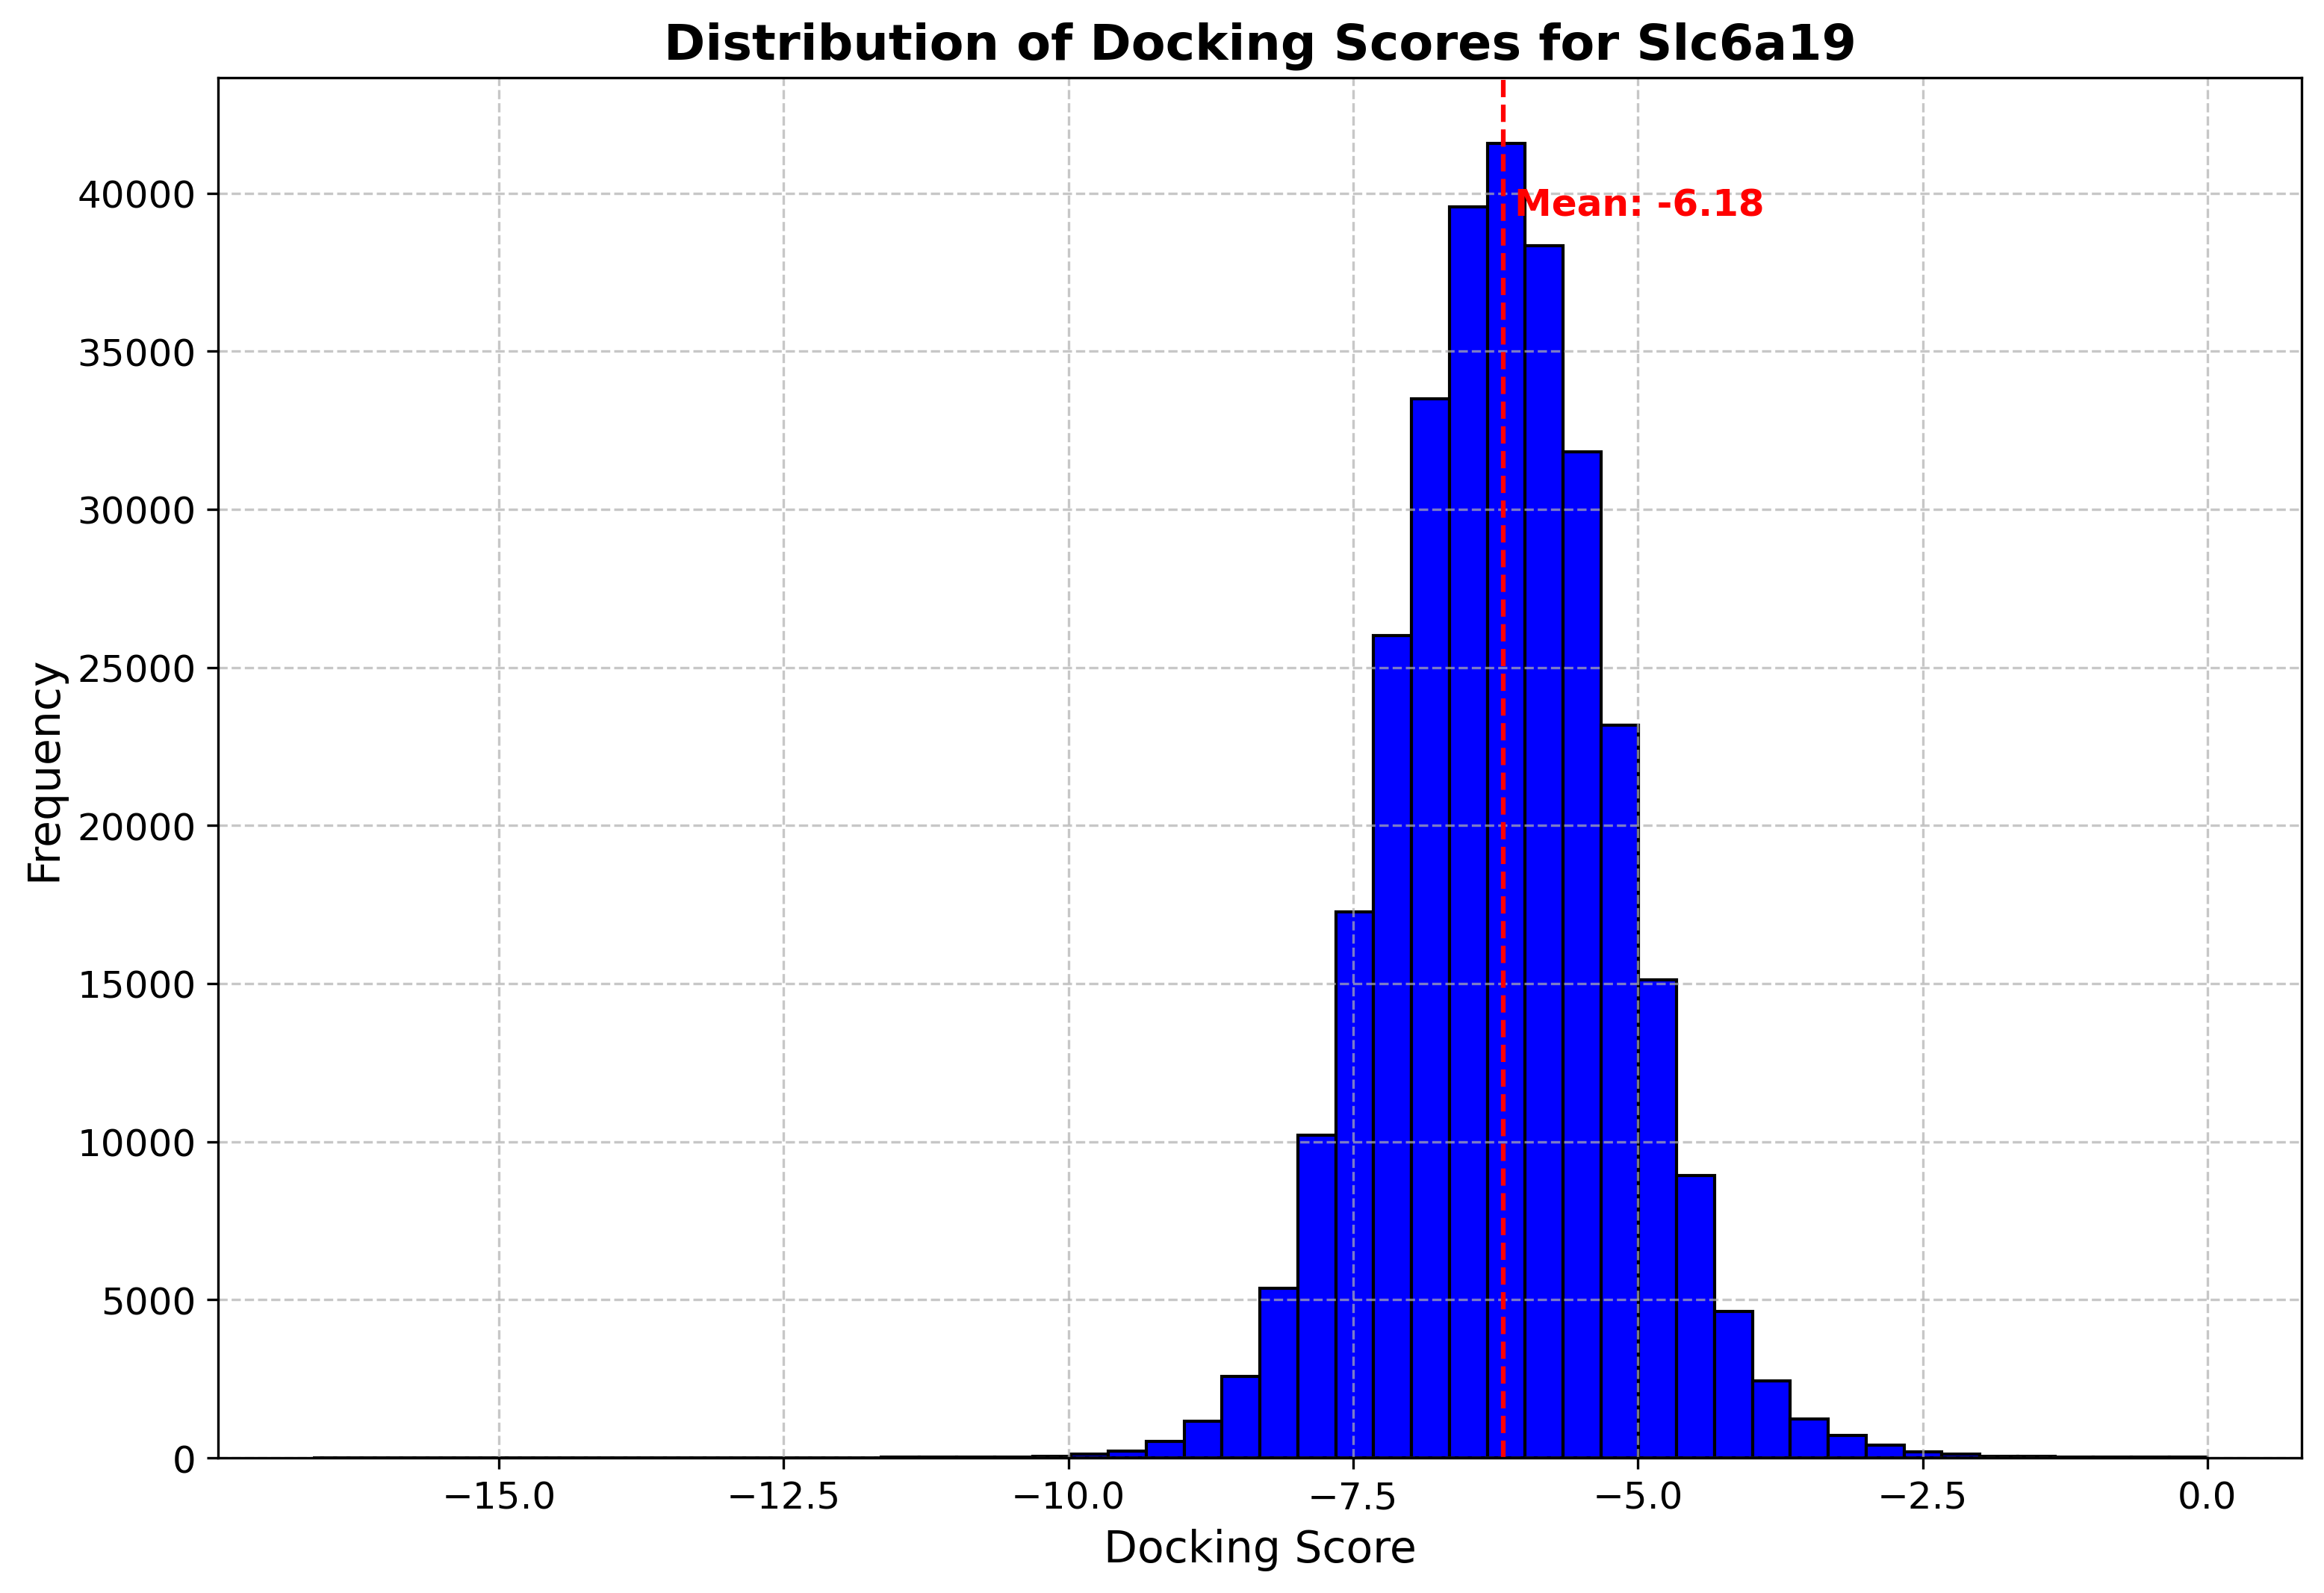

<Figure size 640x480 with 0 Axes>

In [13]:
# Create the plot
plt.figure(figsize=(12, 8), dpi=300)
plt.hist(filtered_scores, bins=50, color='blue', edgecolor='black')

# Add titles and labels with larger font sizes and bold title
plt.title('Distribution of Docking Scores for Slc6a19', fontsize=16, weight='bold')
plt.xlabel('Docking Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Add a vertical line for the mean
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1.5)
plt.text(mean_score + 0.1, plt.ylim()[1] * 0.9, f'Mean: {mean_score:.2f}', color='red', fontsize=12, weight='bold')

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()
plt.savefig('slc6a19.jpg')